In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Data/credit_risk_dataset_cleaned.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28627,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
28628,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
28629,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28630,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.skew().sort_values(ascending=False)

person_income                 9.049089
person_age                    1.920265
cb_person_cred_hist_length    1.661837
loan_status                   1.375965
person_emp_length             1.254614
loan_amnt                     1.173796
loan_percent_income           1.077015
loan_int_rate                 0.204112
dtype: float64

<AxesSubplot:>

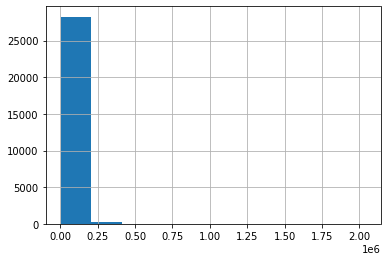

In [4]:
df["person_income"].hist()

<AxesSubplot:>

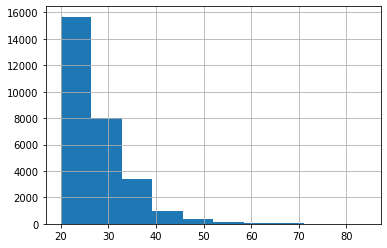

In [5]:
df["person_age"].hist()

<AxesSubplot:>

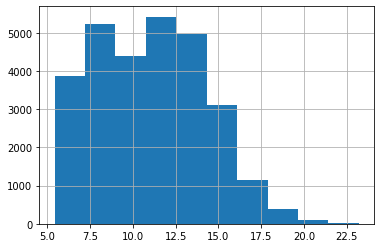

In [6]:
df["loan_int_rate"].hist()

C:\Users\Dev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_income'>

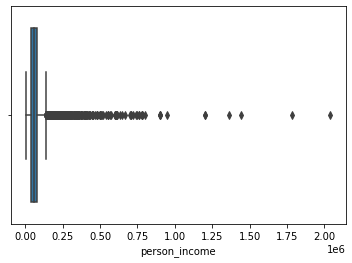

In [7]:
sns.boxplot(df["person_income"])

In [8]:
percentile25 = df['person_income'].quantile(0.25)
percentile75 = df['person_income'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df1 = df[df['person_income'] < upper_limit]
df1[df1['person_income'] > lower_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28626,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
28627,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
28628,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
28629,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


C:\Users\Dev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_income'>

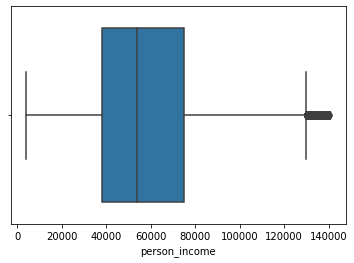

In [9]:
sns.boxplot(df1["person_income"])

<AxesSubplot:>

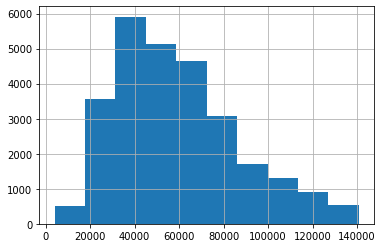

In [10]:
df1["person_income"].hist()

In [11]:
df1.skew().sort_values(ascending=False)

person_age                    1.950605
cb_person_cred_hist_length    1.680590
loan_status                   1.335983
person_emp_length             1.245167
loan_amnt                     1.165931
loan_percent_income           1.049850
person_income                 0.741836
loan_int_rate                 0.198748
dtype: float64

<AxesSubplot:>

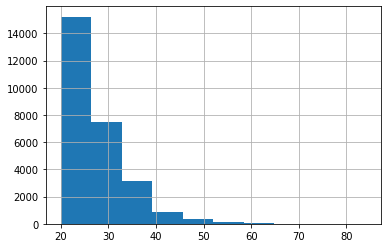

In [12]:
df1["person_age"].hist()

C:\Users\Dev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_age'>

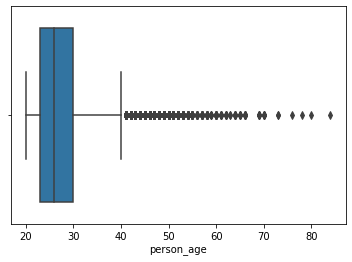

In [13]:
sns.boxplot(df1["person_age"])

In [14]:
percentile25 = df1['person_age'].quantile(0.25)
percentile75 = df1['person_age'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df1 = df1[df1['person_age'] < upper_limit]
df1[df1['person_age'] > lower_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28375,38,99996,OWN,22.0,MEDICAL,D,25000,14.96,0,0.25,N,11
28376,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
28379,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13
28380,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13


In [15]:
df1.skew().sort_values(ascending=False)

loan_status                   1.334844
cb_person_cred_hist_length    1.282832
loan_amnt                     1.165289
person_emp_length             1.060555
loan_percent_income           1.051019
person_age                    0.974645
person_income                 0.745747
loan_int_rate                 0.197333
dtype: float64

<AxesSubplot:>

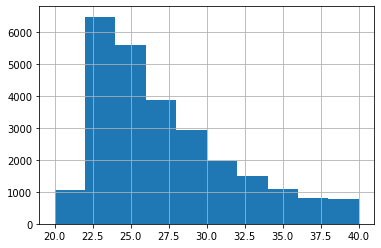

In [16]:
df1["person_age"].hist()

In [17]:
# log transformation

df_log_transformed = df1[['loan_amnt', 'loan_percent_income', 'person_income', 'loan_int_rate']].apply(lambda x: np.log(x))

In [18]:
df_log_transformed

,loan_amnt,loan_percent_income,person_income,loan_int_rate
0,6.907755,-2.302585,9.169518,2.410542
1,8.612503,-0.562119,9.169518,2.554899
2,10.463103,-0.634878,11.089805,2.723267
3,10.463103,-0.597837,10.904119,2.658159
4,7.824046,-1.386294,9.200290,1.965713
...,...,...,...,...
28375,10.126631,-1.386294,11.512885,2.705380
28376,8.294050,-3.218876,11.407565,1.890095
28379,9.680344,-1.897120,11.608236,2.484073
28380,8.294050,-3.218876,11.429544,1.986504


In [19]:
df_log_transformed.describe()

,loan_amnt,loan_percent_income,person_income,loan_int_rate
count,26119.000000,26119.000000,26119.000000,26119.000000
mean,8.922144,-1.954094,10.873828,2.354792
std,0.700400,0.681023,0.489897,0.306962
min,6.214608,-4.605170,8.313852,1.690096
25%,8.517193,-2.407946,10.546236,2.066863
50%,8.987197,-1.897120,10.896739,2.396986
75%,9.392662,-1.469676,11.225243,2.600465
max,10.463103,-0.186330,11.851567,3.145014


In [20]:
df_log_transformed = df_log_transformed.loc[df_log_transformed['loan_percent_income'] != -np.inf]

In [21]:
df_log_transformed.describe()

,loan_amnt,loan_percent_income,person_income,loan_int_rate
count,26119.000000,26119.000000,26119.000000,26119.000000
mean,8.922144,-1.954094,10.873828,2.354792
std,0.700400,0.681023,0.489897,0.306962
min,6.214608,-4.605170,8.313852,1.690096
25%,8.517193,-2.407946,10.546236,2.066863
50%,8.987197,-1.897120,10.896739,2.396986
75%,9.392662,-1.469676,11.225243,2.600465
max,10.463103,-0.186330,11.851567,3.145014


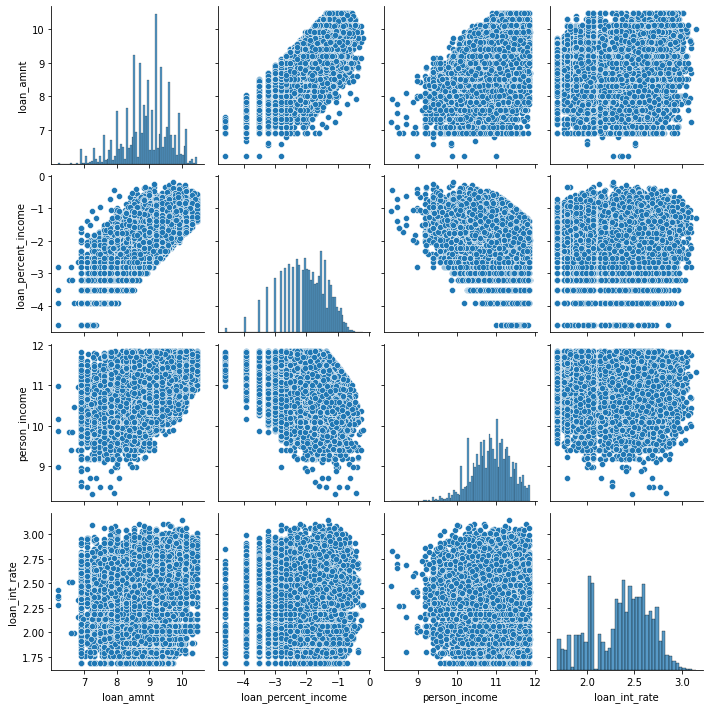

In [22]:
sns.pairplot(df_log_transformed)

In [23]:
df_log_transformed['loan_status'] = df1['loan_status']

In [24]:
df_log_transformed.skew().sort_values(ascending=False)

loan_status            1.334844
loan_int_rate         -0.321742
person_income         -0.407028
loan_amnt             -0.460884
loan_percent_income   -0.570333
dtype: float64

In [25]:
df1.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [26]:
df_log_transformed["person_age"] = df1["person_age"]
df_log_transformed["person_emp_length"] = df1["person_emp_length"]
df_log_transformed["cb_person_cred_hist_length"] = df1["cb_person_cred_hist_length"]

In [31]:
df_log_transformed["person_home_ownership"] = df1["person_home_ownership"]
df_log_transformed["loan_intent"] = df1["loan_intent"]
df_log_transformed["loan_grade"] = df1["loan_grade"]
df_log_transformed["cb_person_default_on_file"] = df1["cb_person_default_on_file"]

In [32]:
df_log_transformed

,loan_amnt,loan_percent_income,person_income,loan_int_rate,loan_status,person_age,person_emp_length,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,6.907755,-2.302585,9.169518,2.410542,0,21,5.0,2,OWN,EDUCATION,B,N
1,8.612503,-0.562119,9.169518,2.554899,1,25,1.0,3,MORTGAGE,MEDICAL,C,N
2,10.463103,-0.634878,11.089805,2.723267,1,23,4.0,2,RENT,MEDICAL,C,N
3,10.463103,-0.597837,10.904119,2.658159,1,24,8.0,4,RENT,MEDICAL,C,Y
4,7.824046,-1.386294,9.200290,1.965713,1,21,2.0,2,OWN,VENTURE,A,N
...,...,...,...,...,...,...,...,...,...,...,...,...
28375,10.126631,-1.386294,11.512885,2.705380,0,38,22.0,11,OWN,MEDICAL,D,N
28376,8.294050,-3.218876,11.407565,1.890095,0,37,11.0,15,MORTGAGE,DEBTCONSOLIDATION,A,N
28379,9.680344,-1.897120,11.608236,2.484073,0,38,5.0,13,MORTGAGE,MEDICAL,B,N
28380,8.294050,-3.218876,11.429544,1.986504,0,36,18.0,13,MORTGAGE,DEBTCONSOLIDATION,A,N


In [34]:
df_log_transformed = df_log_transformed.dropna()
df_log_transformed

,loan_amnt,loan_percent_income,person_income,loan_int_rate,loan_status,person_age,person_emp_length,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,6.907755,-2.302585,9.169518,2.410542,0,21,5.0,2,OWN,EDUCATION,B,N
1,8.612503,-0.562119,9.169518,2.554899,1,25,1.0,3,MORTGAGE,MEDICAL,C,N
2,10.463103,-0.634878,11.089805,2.723267,1,23,4.0,2,RENT,MEDICAL,C,N
3,10.463103,-0.597837,10.904119,2.658159,1,24,8.0,4,RENT,MEDICAL,C,Y
4,7.824046,-1.386294,9.200290,1.965713,1,21,2.0,2,OWN,VENTURE,A,N
...,...,...,...,...,...,...,...,...,...,...,...,...
28375,10.126631,-1.386294,11.512885,2.705380,0,38,22.0,11,OWN,MEDICAL,D,N
28376,8.294050,-3.218876,11.407565,1.890095,0,37,11.0,15,MORTGAGE,DEBTCONSOLIDATION,A,N
28379,9.680344,-1.897120,11.608236,2.484073,0,38,5.0,13,MORTGAGE,MEDICAL,B,N
28380,8.294050,-3.218876,11.429544,1.986504,0,36,18.0,13,MORTGAGE,DEBTCONSOLIDATION,A,N


In [35]:
one_hot_encoded_data = pd.get_dummies(df_log_transformed, columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])
one_hot_encoded_data

,loan_amnt,loan_percent_income,person_income,loan_int_rate,loan_status,person_age,person_emp_length,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,6.907755,-2.302585,9.169518,2.410542,0,21,5.0,2,0,0,...,0,0,1,0,0,0,0,0,1,0
1,8.612503,-0.562119,9.169518,2.554899,1,25,1.0,3,1,0,...,0,0,0,1,0,0,0,0,1,0
2,10.463103,-0.634878,11.089805,2.723267,1,23,4.0,2,0,0,...,0,0,0,1,0,0,0,0,1,0
3,10.463103,-0.597837,10.904119,2.658159,1,24,8.0,4,0,0,...,0,0,0,1,0,0,0,0,0,1
4,7.824046,-1.386294,9.200290,1.965713,1,21,2.0,2,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,10.126631,-1.386294,11.512885,2.705380,0,38,22.0,11,0,0,...,0,0,0,0,1,0,0,0,1,0
28376,8.294050,-3.218876,11.407565,1.890095,0,37,11.0,15,1,0,...,0,1,0,0,0,0,0,0,1,0
28379,9.680344,-1.897120,11.608236,2.484073,0,38,5.0,13,1,0,...,0,0,1,0,0,0,0,0,1,0
28380,8.294050,-3.218876,11.429544,1.986504,0,36,18.0,13,1,0,...,0,1,0,0,0,0,0,0,1,0


In [36]:
one_hot_encoded_data.isna().sum()

loan_amnt                         0
loan_percent_income               0
person_income                     0
loan_int_rate                     0
loan_status                       0
person_age                        0
person_emp_length                 0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_N       0
cb_person_default_on_file_Y       0
dtype: int64

In [37]:
one_hot_encoded_data.skew().sort_values(ascending=False)

loan_grade_G                      21.925840
person_home_ownership_OTHER       17.764115
loan_grade_F                      11.921779
loan_grade_E                       5.536187
person_home_ownership_OWN          3.182865
loan_intent_HOMEIMPROVEMENT        2.504387
loan_grade_D                       2.452451
loan_intent_DEBTCONSOLIDATION      1.863550
loan_intent_PERSONAL               1.783482
loan_intent_VENTURE                1.712458
cb_person_default_on_file_Y        1.688904
loan_intent_MEDICAL                1.614090
loan_grade_C                       1.497635
loan_intent_EDUCATION              1.473070
loan_status                        1.334844
cb_person_cred_hist_length         1.282832
person_emp_length                  1.060555
person_age                         0.974645
loan_grade_B                       0.779930
loan_grade_A                       0.722616
person_home_ownership_MORTGAGE     0.415378
person_home_ownership_RENT        -0.087611
loan_int_rate                   

In [38]:
one_hot_encoded_data.to_csv(r'G:\Finance and Banking Data Science Projects\Credit Risk Assesment\Data\credit_risk_dataset_prepared.csv', index=False)